#Training LSTMs to do sentimental analysis on IMDB dataset .

In [14]:
import warnings
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

#### Load IMDB from Keras dataset

In [15]:
num_words = 2000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=2000)

#### Padding the sequence to the same length

In [16]:
max_review_length = 250
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

####Creating the model

In [17]:
model = Sequential([
    Embedding(input_dim=2000,output_dim=128,input_length=250),
    Dropout(0.2),
    LSTM(128),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 128)          256000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 420,865
Trainable params: 420,865
Non-trainable params: 0
________________________________________________

#### Compiling the Model

#### Fit model

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(X_train,y_train,batch_size=32,epochs=8,verbose=2,validation_split=0.2)

Epoch 1/8
625/625 - 12s - loss: 0.4580 - accuracy: 0.7786 - val_loss: 0.3587 - val_accuracy: 0.8504
Epoch 2/8
625/625 - 11s - loss: 0.3486 - accuracy: 0.8496 - val_loss: 0.3257 - val_accuracy: 0.8736
Epoch 3/8
625/625 - 12s - loss: 0.2848 - accuracy: 0.8828 - val_loss: 0.3300 - val_accuracy: 0.8672
Epoch 4/8
625/625 - 12s - loss: 0.2505 - accuracy: 0.8995 - val_loss: 0.3774 - val_accuracy: 0.8376
Epoch 5/8
625/625 - 11s - loss: 0.2167 - accuracy: 0.9139 - val_loss: 0.3492 - val_accuracy: 0.8668
Epoch 6/8
625/625 - 11s - loss: 0.2048 - accuracy: 0.9194 - val_loss: 0.3559 - val_accuracy: 0.8678
Epoch 7/8
625/625 - 11s - loss: 0.1782 - accuracy: 0.9325 - val_loss: 0.3496 - val_accuracy: 0.8694
Epoch 8/8
625/625 - 11s - loss: 0.1579 - accuracy: 0.9386 - val_loss: 0.3941 - val_accuracy: 0.8666


#### Show train and validation history: loss and accuracy

In [20]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

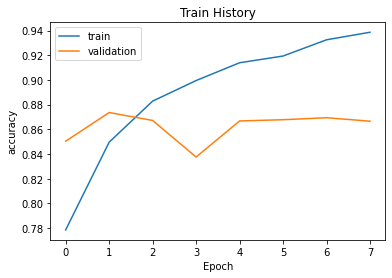

In [21]:
show_train_history(train_history,'accuracy','val_accuracy')

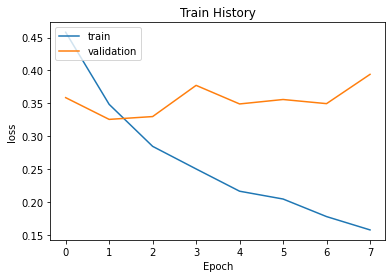

In [22]:
show_train_history(train_history,'loss','val_loss')

#### Evaluate model by test set

In [23]:
scores = model.evaluate(X_test, y_test, verbose=1)

print("Accuracy of the Model is : ",scores[1])

782/782 [==============================] - 6s 7ms/step - loss: 0.3974 - accuracy: 0.8648
Accuracy of the Model is :  0.8648399710655212


#### Predicting test data

In [24]:
predict = model.predict_classes(X_test)
predict_classes = predict.reshape(len(X_test))
warnings.filterwarnings('ignore')

In [25]:
def get_original_text(a):
    word2id = imdb.get_word_index()
    id2word = {i: word for word, i in word2id.items()}
    return ' '.join([id2word.get(i, ' ') for i in X_train[a]])

SentimentDict={1:'positive', 0:'negative'}

def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])

In [26]:
display_test_sentiment(4504)
display_test_sentiment(85)

is mark to fight i've fact ask you for and and as and and ' it these main doesn't not element basically in and and it by br of suspense before however this only middle to all it true cast stewart this of almost br of and and and directing all effects but of father my scene true cast of black may and to and and it hear in cheap and teacher this documentary in and of and br is flick and of flick br of and and and and to of others found and and and as flick after true at of and and br of and black movie was takes sequel besides and it true cast shot movie and train and take of and merely agree other disaster is herself br below sad films of being br and with sad that's to and and we which up of runs giant this of gary take with of being br and anyone who and and is and fun like attempt and she these and probably interesting of see scientist son br of you of problem you it world and to much nice this seemed and really and is quite in of sequences and and scenes this of 5 it and world bizar